# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 

* 가설2 : 

* 가설3 : 

* 가설4 : 

* 가설5 : 

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) COLLEGE

In [3]:
var= 'COLLEGE'
temp =  mobile[var]

① 변수의 비즈니스 의미

> 대학 졸업 여부

② 숫자, 범주?

In [4]:
temp.unique()

array([1, 0], dtype=int64)

> 범주 : 1 - 대학졸업, 0 - 미졸업

③ NaN 존재 유무

In [5]:
temp.isna().sum()

0

> NaN은 존재하지 않음

④ 기초통계량(수치화)

In [6]:
print(temp.value_counts())
print(temp.value_counts()/ len(temp))

1    9049
0    8951
Name: COLLEGE, dtype: int64
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


⑤ 분포 확인(시각화)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


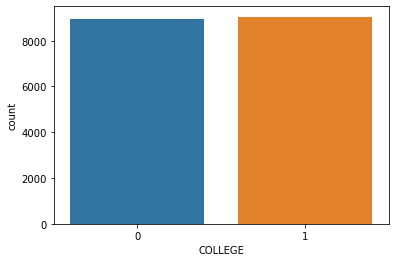

In [7]:
sns.countplot(temp)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 고객중 대학 졸업자와 미졸업자 비율이 거의 1:1 임
==> 어떻게 그럴수 있을까?

⑦ 추가 분석해 볼 사항이 있나요?

> * 졸업여부와 이탈여부의 관계는?

### 2) INCOME

In [8]:
var= 'INCOME'
temp =  mobile[var]

1) 변수의 비즈니스 의미

> 고객의 연 수입($)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [9]:
temp.isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [10]:
temp.describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

5) 분포 확인(시각화)

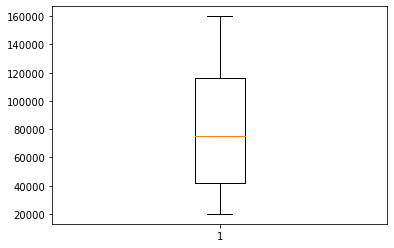

20007.0 159983.0


In [11]:
box = plt.boxplot(temp)
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

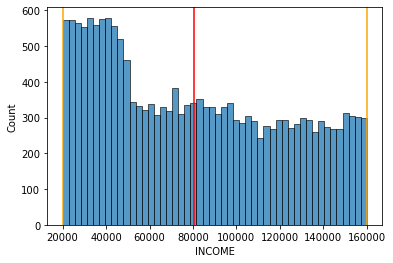

In [12]:
avg = temp.mean()

sns.histplot(temp, bins = 50)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 고객소득 분포가 특이함
    * 50000 달러 이전과 이후로 구분되어 보임
    * 20000 달러는 최저임금일 수도 있음.
    * 그렇다면 160000달러는 최대임금? --> 말이 안됨.
    * 아마도, 이런 데이터를 모았거나, 이상치 데이터를 조치한 것이거나...

7) 추가 분석해 볼 사항이 있나요?

> * 수익을 50000 달러 이전과 이후로 구분하고, 이에따른 이탈 여부를 비교

### 3) OVERAGE

In [13]:
var= 'OVERAGE'
temp =  mobile[var]

1) 변수의 비즈니스 의미

> 월 평균 초과사용 시간(분)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [14]:
temp.isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [15]:
temp.describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

5) 분포 확인(시각화)

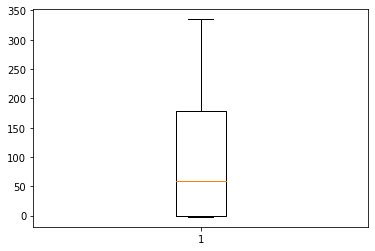

-2.0 335.0


In [16]:
box = plt.boxplot(temp)
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

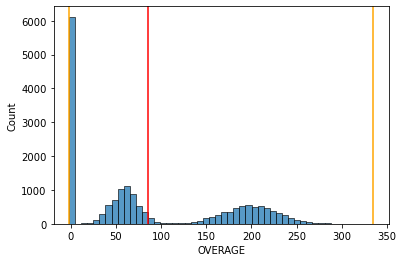

In [17]:
avg = temp.mean()

sns.histplot(temp, bins = 50)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 분포가 명확하게 3가지로 구분됨
    * 초과사용 : 0
    * 초과사용 : 60분 기준
    * 초과사용 : 200분 기준
* 왜 이런 분포가 나왔을까?
    * 초과사용에 대한 요금제 때문이 아닐까?

7) 추가 분석해 볼 사항이 있나요?

> * 그룹을 3개로 나눠서 이탈여부와의 관계를 분석할 필요 있음.

### 4) LEFTOVER

In [18]:
var= 'LEFTOVER'
temp =  mobile[var]

1) 변수의 비즈니스 의미

> 월 평균 통화 잔여량 비율(%)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [19]:
temp.isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [20]:
temp.describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

5) 분포 확인(시각화)

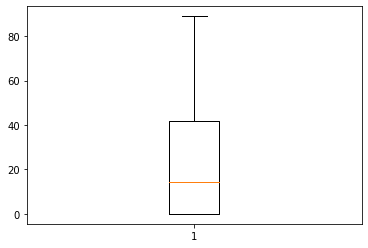

0.0 89.0


In [21]:
box = plt.boxplot(temp)
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

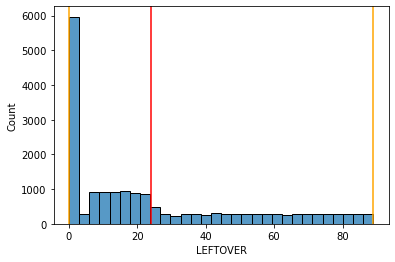

In [22]:
avg = temp.mean()

sns.histplot(temp, bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 분포가 대략 3가지로 구분됨
    * 잔여비율 : 0
    * 잔여비율 : 25% 이내
    * 잔여비율 : 25% 이상
* 왜 이런 분포가 나왔을까?


7) 추가 분석해 볼 사항이 있나요?

> * 그룹을 3개로 나눠서 이탈여부와의 관계를 분석할 필요 있음.
* 잔여비율과 초과사용을 하나의 변수로 결합하여 분석

In [97]:
left0 = mobile.loc[mobile['LEFTOVER']==0,['LEFTOVER','OVERAGE']]
left0

,LEFTOVER,OVERAGE
4,0,0
6,0,235
12,0,51
13,0,0
16,0,189
...,...,...
17989,0,60
17990,0,0
17991,0,0
17994,0,0


### 5) HOUSE

In [23]:
var= 'HOUSE'
temp =  mobile[var]

1) 변수의 비즈니스 의미

> 고객 주택 가격($)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [24]:
print(temp.isna().sum())
print(temp.isna().sum()/len(temp))

215
0.011944444444444445


> NaN 215건, 1.2% 존재

4) 기초통계량(수치화)

In [25]:
temp.describe()

count     17785.000000
mean     492950.532696
std      252175.173507
min      150015.000000
25%      263876.000000
50%      452277.000000
75%      701460.000000
max      999970.000000
Name: HOUSE, dtype: float64

5) 분포 확인(시각화)

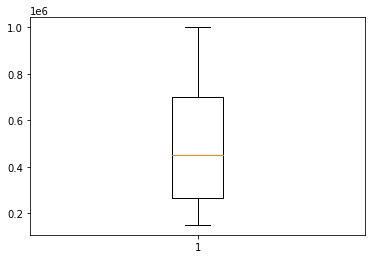

150015.0 999970.0


In [26]:
# NaN을 제외하고 boxplot을 그려야 함.
temp = temp[temp.notnull()]

box = plt.boxplot(temp)
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

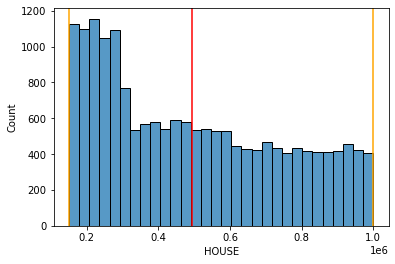

In [27]:
avg = temp.mean()

sns.histplot(temp, bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 분포가 2가지로 구분됨
    * 500000 달러 전과 후
* 왜 이런 분포가 나왔을까?


7) 추가 분석해 볼 사항이 있나요?

> * 그룹을 2개로 나눠서 이탈여부와의 관계를 분석할 필요 있음.
* 집값과 연 소득과의 관계

### 6) HANDSET_PRICE

In [28]:
var= 'HANDSET_PRICE'
temp =  mobile[var]

1) 변수의 비즈니스 의미

> 스마트폰 가격

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [29]:
temp.isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [30]:
temp.describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

5) 분포 확인(시각화)

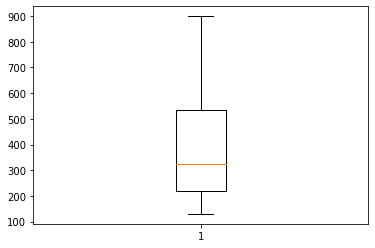

130.0 899.0


In [31]:
box = plt.boxplot(temp)
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

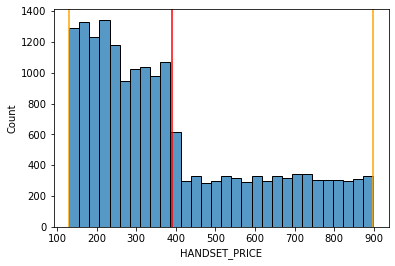

In [32]:
avg = temp.mean()

sns.histplot(temp, bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 분포가 2가지로 구분됨
    * 400달러 이하, 초과
* 왜 이런 분포가 나왔을까?


7) 추가 분석해 볼 사항이 있나요?

> * 그룹을 2개로 나눠서 이탈여부와의 관계를 분석할 필요 있음.
* 스마트폰 가격과 연소득 관계

### 7) AVERAGE_CALL_DURATION

In [33]:
var= 'AVERAGE_CALL_DURATION'
temp =  mobile[var]

1) 변수의 비즈니스 의미

> 월 평균 통화 시간(분).

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [34]:
temp.isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [35]:
temp.describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

5) 분포 확인(시각화)

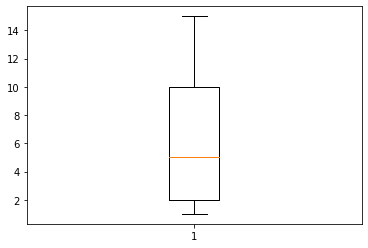

1.0 15.0


In [36]:
box = plt.boxplot(temp)
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

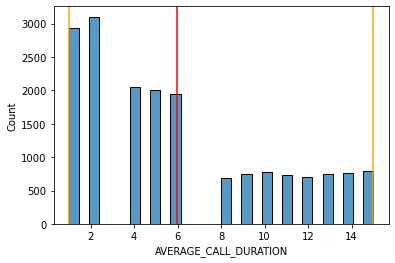

In [37]:
avg = temp.mean()

sns.histplot(temp, bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 분포가 3가지로 구분됨
    * 0~2분
    * 4~6분
    * 8분~
* 왜 이런 분포가 나왔을까?


7) 추가 분석해 볼 사항이 있나요?

> * 각 그룹별 이탈여부와 관계

### 8) REPORTED_SATISFACTION

In [38]:
var= 'REPORTED_SATISFACTION'
temp =  mobile[var]

① 변수의 비즈니스 의미

> 만족도 설문조사 결과

② 숫자, 범주?

In [39]:
temp.unique()

array(['unsat', 'very_unsat', 'very_sat', 'sat', nan, 'avg'], dtype=object)

> 범주 : 'very_unsat', 'unsat', 'avg','sat','very_sat'

③ NaN 존재 유무

In [40]:
print(temp.isna().sum())
print(temp.isna().sum()/len(temp))

38
0.002111111111111111


> * NaN 존재 : 38건, 0.2%
* 조치 방법
    * 삭제?
    * 채우기?

④ 기초통계량(수치화)

In [41]:
print(temp.value_counts())
print(temp.value_counts()/ len(temp))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


⑤ 분포 확인(시각화)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


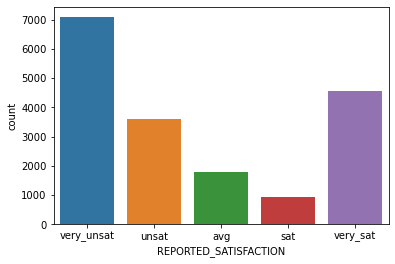

In [42]:
sns.countplot(temp, order = ['very_unsat', 'unsat', 'avg','sat','very_sat'])
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 매우불만이 가장 높은 비율. 그 다음이 매우 만족. ==> 양극화. 왜?


⑦ 추가 분석해 볼 사항이 있나요?

> * 매우불만, 매우만족 집단의 특성을 살펴볼 필요가 있음

### 9) CONSIDERING_CHANGE_OF_PLAN

In [43]:
var= 'CONSIDERING_CHANGE_OF_PLAN'
temp =  mobile[var]

① 변수의 비즈니스 의미

> 향후 번호이동 계획 조사 결과

② 숫자, 범주?

In [44]:
temp.unique()

array(['considering', 'no', 'never_thought', 'actively_looking_into_it',
       'perhaps'], dtype=object)

> 범주 : 'very_unsat', 'unsat', 'avg','sat','very_sat'

③ NaN 존재 유무

In [45]:
print(temp.isna().sum())
print(temp.isna().sum()/len(temp))

0
0.0


> * NaN 없음

④ 기초통계량(수치화)

In [46]:
print(temp.value_counts())
print(temp.value_counts()/ len(temp))

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


⑤ 분포 확인(시각화)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


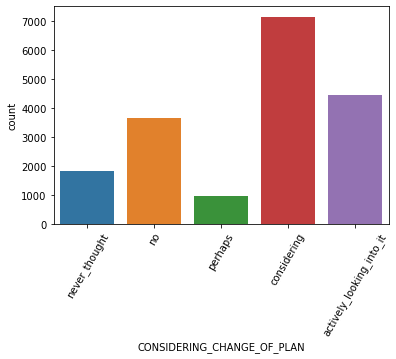

In [47]:
sns.countplot(temp, order = ['never_thought','no', 'perhaps', 'considering', 'actively_looking_into_it'])
plt.xticks(rotation = 60)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 향후 변경 계획이 있는 사람이 그렇지 않은 사람보다 높다.
    * 'considering', 'actively_looking_into_it' : 약 65%

⑦ 추가 분석해 볼 사항이 있나요?

> * 각 답변에 따른 이탈여부 
* 만족도 조사와 변경계획 관계, 그에 따른 이탈여부


### 10) CHURN

In [48]:
var= 'CHURN'
temp =  mobile[var]

① 변수의 비즈니스 의미

> 이탈 여부

② 숫자, 범주?

In [49]:
temp.unique()

array([0, 1], dtype=int64)

> 범주 : 0 - 잔류, 1 - 이탈(번호이동)

③ NaN 존재 유무

In [50]:
print(temp.isna().sum())
print(temp.isna().sum()/len(temp))

0
0.0


> * NaN 없음 (y, 당연히 NaN이 없어야 함)

④ 기초통계량(수치화)

In [51]:
print(temp.value_counts())
print(temp.value_counts()/ len(temp))

0    9131
1    8869
Name: CHURN, dtype: int64
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


⑤ 분포 확인(시각화)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


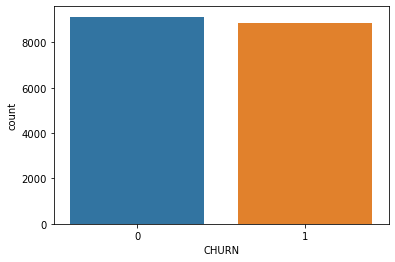

In [52]:
sns.countplot(temp)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 잔존과 이탈 비율이 1:1
    * ==> 실제 비즈니스 상황에서도 1:1일까? 
    * 아마도 범주 밸런스를 맞춘 것으로 보임(이 부분은 향후 모델링에서 중요한 부분)

⑦ 추가 분석해 볼 사항이 있나요?

> 다른 feature들과 비교

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

In [53]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [54]:
target = 'CHURN'

In [55]:
# 전체 이탈율
total_mean = mobile[target].mean()
print(total_mean)

0.49272222222222223


#### 1) COLLEGE --> CHURN

In [56]:
var = 'COLLEGE'

① 교차표(pd.crosstab())

In [57]:
temp = pd.crosstab(mobile[var], mobile[target] , normalize = 'index')
temp

CHURN,0,1
COLLEGE,,
0,0.515697,0.484303
1,0.498950,0.501050


② 시각화( Stacked Bar, Mosaic)

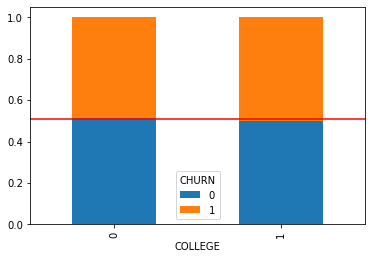

In [58]:
# 100% Stacked Bar
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r')
plt.show()

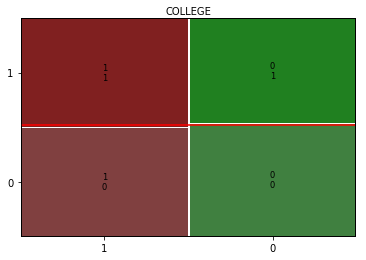

In [59]:
# Mosaic
mosaic(mobile, [ var, target]) # [x축, y축]
plt.axhline(1- total_mean, color = 'r')
plt.xlabel(var)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> COLLEGE와 CHURN 간에는 관련이 없어 보임

③ 가설검정(카이제곱검정)

In [60]:
table = pd.crosstab(mobile[target], mobile[var])
chiresult = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(chiresult[0]))
print("p-value : {:.20f}".format(chiresult[1]))

카이제곱통계량 : 4.982102934693503
p-value : 0.02561083347822053560


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * 차트를 통해서는 대학졸업여부와 이탈여부는 관련이 없어 보임. 
* 그러나 카이제곱검정으로는 pvalue가 0.02로 유의수준 0.05보다 작게 나옴
* 결론 : 약한 관계

#### 2) REPORTED_SATISFACTION  --> CHURN

In [61]:
var = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

In [62]:
temp = pd.crosstab(mobile[var], mobile[target] , normalize = 'index')
temp

CHURN,0,1
REPORTED_SATISFACTION,,
avg,0.527132,0.472868
sat,0.527897,0.472103
unsat,0.499164,0.500836
very_sat,0.511618,0.488382
very_unsat,0.500990,0.499010


② 시각화( Stacked Bar, Mosaic)

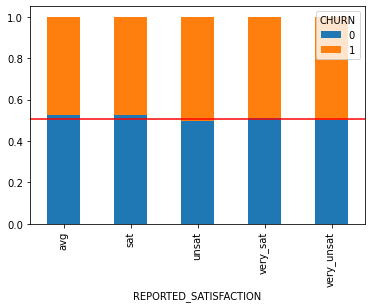

In [63]:
# 100% Stacked Bar
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r')
plt.show()

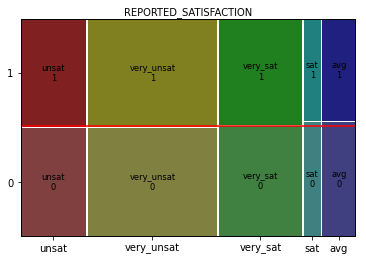

In [64]:
# Mosaic
mosaic(mobile, [ var, target]) # [x축, y축]
plt.axhline(1- total_mean, color = 'r')
plt.xlabel(var)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 보통과 만족에서는 이탈율이 약간 낮으나, 전반적으로 관련이 없어 보임

③ 가설검정(카이제곱검정)

In [65]:
table = pd.crosstab(mobile[target], mobile[var])
chiresult = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(chiresult[0]))
print("p-value : {:.20f}".format(chiresult[1]))

카이제곱통계량 : 6.8411009572056445
p-value : 0.14452738878905066477


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * 차트를 통해서 만족도와 이탈여부는 관련이 없어 보임. 
* 카이제곱검정으로도 pvalue가 0.14로 유의수준 0.05보다 크게 나옴
* 결론 : 관련 없음.

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [66]:
var = 'CONSIDERING_CHANGE_OF_PLAN'

① 교차표(pd.crosstab())

In [67]:
temp = pd.crosstab(mobile[var], mobile[target] , normalize = 'index')
temp

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
actively_looking_into_it,0.511565,0.488435
considering,0.510853,0.489147
never_thought,0.513304,0.486696
no,0.500274,0.499726
perhaps,0.475992,0.524008


② 시각화( Stacked Bar, Mosaic)

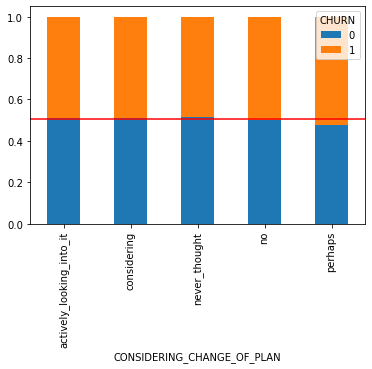

In [68]:
# 100% Stacked Bar
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r')
plt.show()

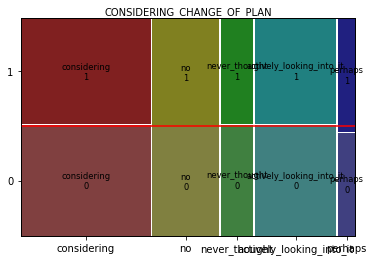

In [69]:
# Mosaic
mosaic(mobile, [ var, target]) # [x축, y축]
plt.axhline(1- total_mean, color = 'r')
plt.xlabel(var)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> perhaps에서는 이탈율이 약간 높으나, 전반적으로 관련이 없어 보임

③ 가설검정(카이제곱검정)

In [70]:
table = pd.crosstab(mobile[target], mobile[var])
chiresult = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(chiresult[0]))
print("p-value : {:.20f}".format(chiresult[1]))

카이제곱통계량 : 5.421434419620689
p-value : 0.24672225866799690763


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * 차트를 통해서 변경계획과 이탈여부는 관련이 없어 보임. 
* 카이제곱검정으로도 pvalue가 0.25로 유의수준 0.05보다 크게 나옴
* 결론 : 관련 없음.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


In [71]:
var = 'INCOME'

① 그래프 : histogram, densityplot

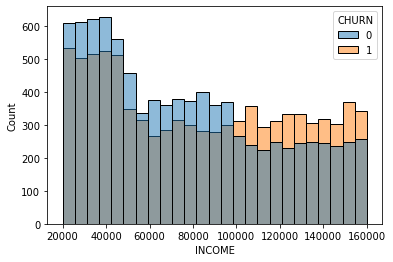

In [72]:
# 히스토그램
sns.histplot(x=var, data = mobile, hue = target)
plt.show()

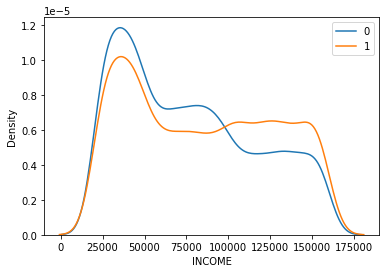

In [73]:
# density plot
t0 = mobile.loc[mobile[target]==0]
t1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=var, data = t0, label = '0')
sns.kdeplot(x=var, data = t1, label = '1')

plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 100000 달러를 기준으로 나뉨.
    * 100000 이내 : 잔류가 더 높음
    * 100000 이상 : 이탈이 더 높음.
* 왜???

② 수치화 : 로지스틱회귀

In [74]:
model=sm.Logit(mobile[target], mobile[var])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * 그래프상으로 10만달러 기준으로 이탈율에 차이가 있다.
* 로지스틱회귀로 부터 얻은 P-value가 0.000044로 0.05보다 작으므로 관련이 있다.
* 결론: 강한 관계가 있다.

#### 2) OVERAGE --> CHURN


In [75]:
var = 'OVERAGE'

① 그래프 : histogram, densityplot

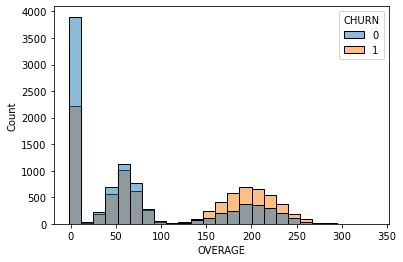

In [76]:
# 히스토그램
sns.histplot(x=var, data = mobile, hue = target)
plt.show()

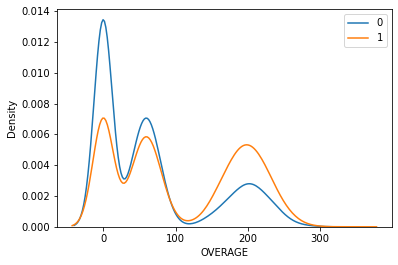

In [77]:
# density plot
t0 = mobile.loc[mobile[target]==0]
t1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=var, data = t0, label = '0')
sns.kdeplot(x=var, data = t1, label = '1')

plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 초과사용 안하는 사람 : 이탈율 낮음
    * 60분 중심 : 이탈율 낮음
    * 200분 중심 : 이탈율 높음
* 많이 사용할 수록 이탈율이 높다. ==> 서비스에 불만을 갖거나, 경쟁사에 비해 비싼 것일까?

② 수치화 : 로지스틱회귀

In [78]:
model=sm.Logit(mobile[target], mobile[var])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * 그래프상으로 이탈율과 관련이 있다.
* 로지스틱회귀로 부터 얻은 P-value가 거의 0에 수렴.
* 결론: 강한 관계가 있다.

#### 3) LEFTOVER --> CHURN


In [79]:
var = 'LEFTOVER'

① 그래프 : histogram, densityplot

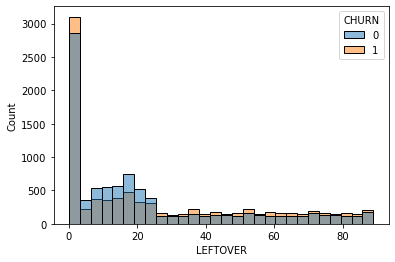

In [80]:
# 히스토그램
sns.histplot(x=var, data = mobile, hue = target)
plt.show()

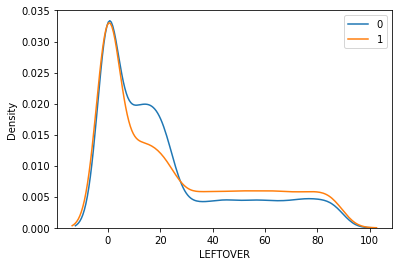

In [81]:
# density plot
t0 = mobile.loc[mobile[target]==0]
t1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=var, data = t0, label = '0')
sns.kdeplot(x=var, data = t1, label = '1')

plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 잔여시간이 
    * 없는사람 : 이탈율 높음
    * 25분 이내 : 이탈율 낮음
    * 25분 이상 : 이탈율 높음


② 수치화 : 로지스틱회귀

In [82]:
model=sm.Logit(mobile[target], mobile[var])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * 그래프상으로 이탈율과 관련이 있다.
* 로지스틱회귀로 부터 얻은 P-value 0.000003
* 결론: 강한 관계가 있다.

#### 4) HOUSE --> CHURN


* **[주의]** HOUSE에 NaN이 존재합니다. ==> 로지스틱회귀를 수행하기 위해서는 NaN을 제외한 데이터로 수행해야 합니다.

In [83]:
var = 'HOUSE'

① 그래프 : histogram, densityplot

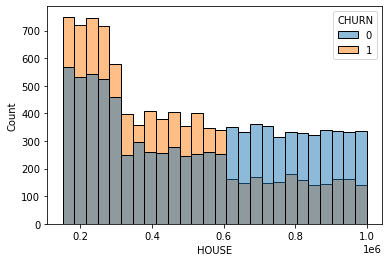

In [84]:
# 히스토그램
sns.histplot(x=var, data = mobile, hue = target)
plt.show()

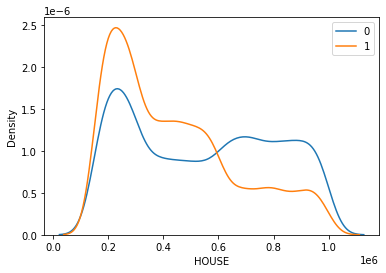

In [85]:
# density plot
t0 = mobile.loc[mobile[target]==0]
t1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=var, data = t0, label = '0')
sns.kdeplot(x=var, data = t1, label = '1')

plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 600000 달러 기준으로 이탈율 나뉨
    * 이하 : 이탈율 높음
    * 이상 : 이탈율 낮음.

② 수치화 : 로지스틱회귀

In [86]:
# NaN 제외한 데이터셋
temp = mobile.loc[mobile[var].notnull()]

model=sm.Logit(temp[target], temp[var])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687266
         Iterations 2
HOUSE    6.401120e-47
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * 그래프상으로 이탈율과 관련이 있다.
* 로지스틱회귀로 부터 얻은 P-value가 거의 0에 수렴.
* 결론: 강한 관계가 있다.

#### 5) HANDSET_PRICE --> CHURN


In [87]:
var = 'HANDSET_PRICE'

① 그래프 : histogram, densityplot

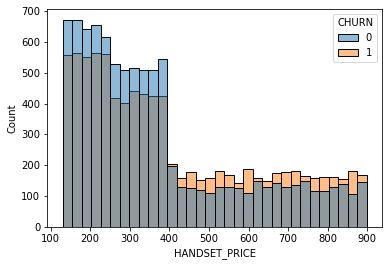

In [88]:
# 히스토그램
sns.histplot(x=var, data = mobile, hue = target)
plt.show()

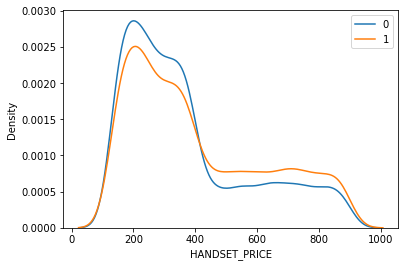

In [89]:
# density plot
t0 = mobile.loc[mobile[target]==0]
t1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=var, data = t0, label = '0')
sns.kdeplot(x=var, data = t1, label = '1')

plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 가격이 400 달러 기준으로 나뉨. 
    * 이내 : 이탈율 낮음
    * 이상 : 이탈율 높음

② 수치화 : 로지스틱회귀

In [90]:
model=sm.Logit(mobile[target], mobile[var])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * 그래프상으로 이탈율과 관련이 있다.
* 로지스틱회귀로 부터 얻은 P-value 0.000107
* 결론: 강한 관계가 있다.

#### 6) AVERAGE_CALL_DURATION --> CHURN


In [91]:
var = 'AVERAGE_CALL_DURATION'

① 그래프 : histogram, densityplot

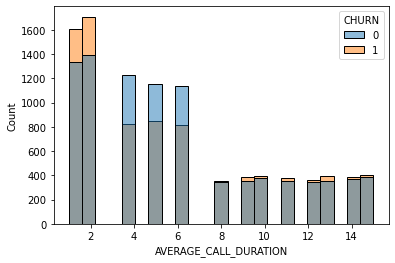

In [92]:
# 히스토그램
sns.histplot(x=var, data = mobile, hue = target)
plt.show()

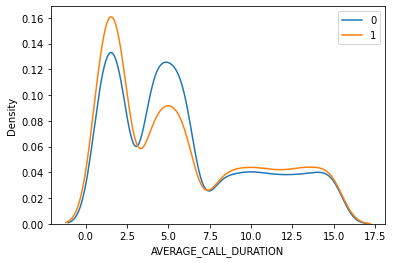

In [93]:
# density plot
t0 = mobile.loc[mobile[target]==0]
t1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=var, data = t0, label = '0')
sns.kdeplot(x=var, data = t1, label = '1')

plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> * 평균 통화 시간이
    * 3분이내 : 이탈율 높음 
    * 3~7분 : 이탈율 낮음
    * 7분이상 : 이탈율 약간 높음.

② 수치화 : 로지스틱회귀

In [94]:
model=sm.Logit(mobile[target], mobile[var])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * 그래프상으로 이탈율과 관련이 있다.
* 로지스틱회귀로 부터 얻은 P-value 0.03으로 0.05보다는 작으나, 다른 값들에 비하면 약한 관계.
* 결론: 로지스틱회귀로 부터 얻은 Pvalue는 미봉책이므로, 시각화로 얻은 정보를 바탕으로, 강한 관계

## 4.관계 정리

### 1) 강한관계의 변수

* INCOME
* OVERAGE
* LEFTOVER
* HOUSE
* HANDSET_PRICE
* AVERAGE_CALL_DURATION

### 2) 약한관계의 변수

* COLLEGE

### 3) 관계 없음

* REPORTED_SATISFACTION
* CONSIDERING_CHANGE_OF_PLAN

### 4) 추가 분석